In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas_datareader as pdr
key="0d2742140da1186402077c574b6026778feb9993"

In [3]:
df = pdr.get_data_tiingo('INFY', api_key=key)

In [4]:
df.to_csv('INFY.csv')

In [5]:
df=pd.read_csv('INFY.csv')

In [6]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,INFY,2016-11-17 00:00:00+00:00,14.10,14.190,14.040,14.12,5170068,6.139891,6.179082,6.113764,6.148601,10340136,0.0,1.0
1,INFY,2016-11-18 00:00:00+00:00,13.89,14.200,13.865,14.04,9913438,6.048446,6.183437,6.037560,6.113764,19826876,0.0,1.0
2,INFY,2016-11-21 00:00:00+00:00,14.00,14.010,13.740,13.89,5760578,6.096346,6.100701,5.983128,6.048446,11521156,0.0,1.0
3,INFY,2016-11-22 00:00:00+00:00,14.06,14.130,13.860,13.92,7518717,6.122473,6.152955,6.035383,6.061510,15037434,0.0,1.0
4,INFY,2016-11-23 00:00:00+00:00,14.13,14.180,13.910,13.94,5558180,6.152955,6.174728,6.057155,6.070219,11116360,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,INFY,2021-11-09 00:00:00+00:00,23.30,23.375,23.065,23.33,5532008,23.300000,23.375000,23.065000,23.330000,5532008,0.0,1.0
1253,INFY,2021-11-10 00:00:00+00:00,22.96,23.210,22.945,23.14,6055289,22.960000,23.210000,22.945000,23.140000,6055289,0.0,1.0
1254,INFY,2021-11-11 00:00:00+00:00,23.20,23.280,23.030,23.03,3639386,23.200000,23.280000,23.030000,23.030000,3639386,0.0,1.0
1255,INFY,2021-11-12 00:00:00+00:00,23.70,23.700,23.530,23.59,5304065,23.700000,23.700000,23.530000,23.590000,5304065,0.0,1.0


In [7]:
df1=df.reset_index()['close']

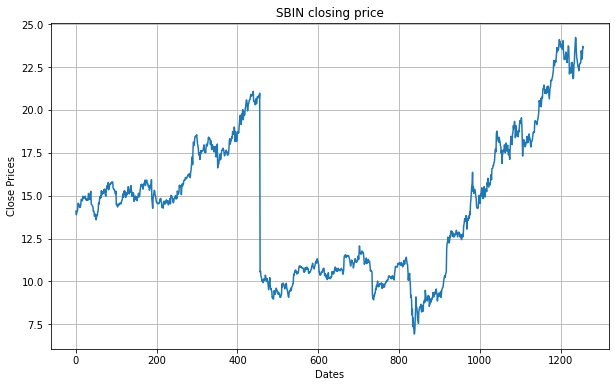

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['close'])
plt.title('SBIN closing price')
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.41435185]
 [0.40219907]
 [0.40856481]
 ...
 [0.94097222]
 [0.96990741]
 [0.96585648]]


In [11]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(817, 440)

In [13]:
train_data

array([[0.41435185],
       [0.40219907],
       [0.40856481],
       [0.41203704],
       [0.41608796],
       [0.43923611],
       [0.44097222],
       [0.4375    ],
       [0.43634259],
       [0.42650463],
       [0.42650463],
       [0.42824074],
       [0.43576389],
       [0.45428241],
       [0.4537037 ],
       [0.45138889],
       [0.44907407],
       [0.46469907],
       [0.45717593],
       [0.45949074],
       [0.46064815],
       [0.45891204],
       [0.46238426],
       [0.46469907],
       [0.45486111],
       [0.45196759],
       [0.45543981],
       [0.45081019],
       [0.45138889],
       [0.45659722],
       [0.45138889],
       [0.47395833],
       [0.46759259],
       [0.45601852],
       [0.46412037],
       [0.4537037 ],
       [0.47743056],
       [0.48090278],
       [0.4375    ],
       [0.4369213 ],
       [0.43402778],
       [0.43113426],
       [0.42939815],
       [0.41377315],
       [0.41550926],
       [0.40856481],
       [0.39641204],
       [0.405

In [14]:
test_data

array([[0.25578704],
       [0.25868056],
       [0.24768519],
       [0.23611111],
       [0.2349537 ],
       [0.21296296],
       [0.18113426],
       [0.19791667],
       [0.18923611],
       [0.20428241],
       [0.18460648],
       [0.16435185],
       [0.12384259],
       [0.13020833],
       [0.11342593],
       [0.06423611],
       [0.08333333],
       [0.02488426],
       [0.05381944],
       [0.02372685],
       [0.01099537],
       [0.        ],
       [0.01041667],
       [0.0462963 ],
       [0.07233796],
       [0.125     ],
       [0.09085648],
       [0.08969907],
       [0.07349537],
       [0.04861111],
       [0.05613426],
       [0.03587963],
       [0.07581019],
       [0.08333333],
       [0.08912037],
       [0.09143519],
       [0.09027778],
       [0.10011574],
       [0.08043981],
       [0.07407407],
       [0.09490741],
       [0.09085648],
       [0.07581019],
       [0.0931713 ],
       [0.10706019],
       [0.10532407],
       [0.11516204],
       [0.107

In [15]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [19]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 [==============================] - 7s 224ms/step - loss: 0.0686 - val_loss: 0.0243
Epoch 2/50
12/12 [==============================] - 2s 137ms/step - loss: 0.0128 - val_loss: 0.0037
Epoch 3/50
12/12 [==============================] - 2s 136ms/step - loss: 0.0080 - val_loss: 0.0129
Epoch 4/50
12/12 [==============================] - 2s 138ms/step - loss: 0.0058 - val_loss: 0.0049
Epoch 5/50
12/12 [==============================] - 2s 134ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 6/50
12/12 [==============================] - 2s 137ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 7/50
12/12 [==============================] - 2s 134ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 8/50
12/12 [==============================] - 2s 135ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 9/50
12/12 [==============================] - 2s 136ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 10/50
12/12 [==============================] - 2s 138ms/step - loss: 0.0043 - val_loss: 0.0018

In [24]:
import tensorflow as tf

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

13.333653017170326

In [28]:
math.sqrt(mean_squared_error(ytest,test_predict))

16.881282499994693

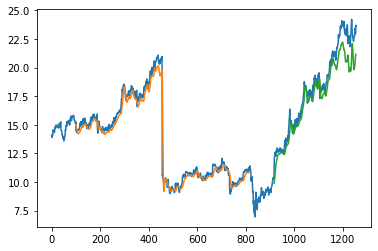

In [29]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()